In [1]:
import matplotlib.pyplot as plt
import ray
import ray.rllib

import pyquake.proto
import q1physrl.env

/home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
ray.init()

2020-01-29 09:41:30,333	WARNING worker.py:673 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2020-01-29 09:41:30,341	WARNING services.py:597 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-01-29 09:41:30,404	INFO resource_spec.py:216 -- Starting Ray with 0.93 GiB memory available for workers and up to 0.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-01-29 09:41:30,742	WARNING services.py:1009 -- Failed to start the reporter. The reporter requires 'pip install psutil'.


{'node_ip_address': '127.0.1.1',
 'redis_address': '127.0.1.1:49948',
 'object_store_address': '/tmp/ray/session_2020-01-29_09-41-30_337991_24589/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-01-29_09-41-30_337991_24589/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2020-01-29_09-41-30_337991_24589'}

In [3]:
trainer = ray.rllib.agents.a3c.A2CTrainer(
    env=q1physrl.env.PhysEnv,
    config={"env_config": {"num_envs": 100}, "gamma": 0.9}
)

2020-01-29 09:41:33,280	INFO trainer.py:371 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-01-29 09:41:33,287	INFO trainer.py:512 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-01-29 09:41:34,279	WARNING util.py:45 -- Install gputil for GPU system monitoring.
2020-01-29 09:41:34,281	WARNING util.py:48 -- Install psutil to monitor system performance.


(pid=24632) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=24632)   warnings.warn(msg)
(pid=24631) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=24631)   warnings.warn(msg)
(pid=24632) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=24632)   warnings.warn(msg)
(pid=24631) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma modu

In [4]:
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-26_18-30-58enaj6dzm/checkpoint_54/checkpoint-54'
FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-27_21-54-210mybah6w/checkpoint_38/checkpoint-38'

trainer.restore(FNAME)

2020-01-29 09:41:37,031	INFO trainable.py:346 -- Restored from checkpoint: /home/matt/ray_results/A2C_PhysEnv_2020-01-27_21-54-210mybah6w/checkpoint_38/checkpoint-38
2020-01-29 09:41:37,034	INFO trainable.py:353 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': 1644200, '_time_total': 387.99199175834656, '_episodes_total': 4600}


In [5]:
DEMO_FILE_NAME = "wr3.dem"

In [6]:
import asyncio
loop = asyncio.get_running_loop()
task = loop.create_task(q1physrl.env.eval_coro(26000, trainer, DEMO_FILE_NAME))

(pid=21481) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=21481)   warnings.warn(msg)


In [7]:
raise Exception

(pid=21480) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=21480)   warnings.warn(msg)
(pid=21481) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=21481)   warnings.warn(msg)
(pid=21480) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=21480)   warnings.warn(msg)


Exception: 

In [8]:
obs, action = task.result()

In [33]:
env = q1physrl.env.PhysEnv({'num_envs': 1})
o, = env.vector_reset()

obs2= [o]

for a in action:
    (o,), _, _, _ = env.vector_step(a[None])
    obs2.append(o)
    
obs2 = np.stack(obs2[:-1])    

In [ ]:
# z velocity doesn't go to zero in real quake when we hit the floor?

# Looks like over the network the z component is None when we hit the floor.  Look into why this is.

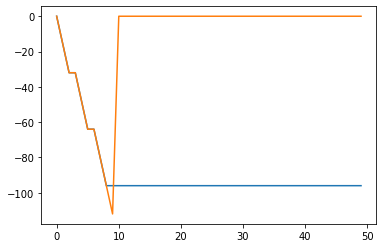

In [51]:
plt.plot(obs[:50, 4])
plt.plot(obs2[:50, 4])

In [49]:
print(obs[8:15])
print(obs2[8:15])

[[ 49.68000031  26.           0.          32.         -96.        ]
 [ 44.64000034  24.375       16.          32.         -96.        ]
 [ 39.60000038  24.          16.          32.         -96.        ]
 [ 34.56000042  24.          32.          64.         -96.        ]
 [ 29.52000046  24.          48.         112.         -96.        ]
 [ 24.4800005   24.          64.         144.         -96.        ]
 [ 24.4800005   24.          80.         176.         -96.        ]]
[[  49.68000031   25.875         0.           32.          -96.        ]
 [  44.64000034   24.25         16.           32.         -112.        ]
 [  39.60000038   24.           16.           32.            0.        ]
 [  34.56000042   24.           32.           64.            0.        ]
 [  29.52000046   24.           48.          112.            0.        ]
 [  24.4800005    24.           48.          144.            0.        ]
 [  24.4800005    24.           64.          176.            0.        ]]


In [47]:
obs2[10, 4]

0.0

In [45]:
np.argmax(np.abs(obs - obs2), axis=1)[10, 4]

4

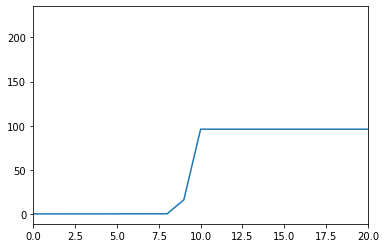

In [35]:
plt.xlim(0, 20)
plt.plot(np.max(np.abs(obs - obs2), axis=1))

In [23]:
obs2

array([[ 90.        ,  32.875     ,   0.        ,   0.        ,
          0.        ],
       [ 84.96000004,  32.5       , -16.        ,  16.        ,
        -16.        ],
       [ 79.92000008,  32.        , -16.        ,  16.        ,
        -32.        ],
       ...,
       [ 14.40000057,  24.        , 240.        , 208.        ,
          0.        ],
       [  9.36000061,  24.        , 240.        , 208.        ,
          0.        ],
       [ 14.40000057,  24.        , 240.        , 208.        ,
          0.        ]])

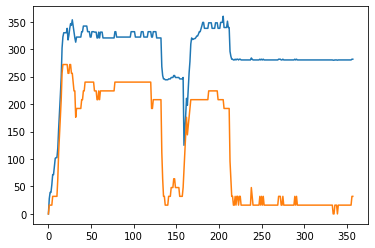

In [17]:
import numpy as np
plt.plot(np.linalg.norm(obs[:, 2:], axis=1))
plt.plot(obs[:, 3])

ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending coro=<AsyncClient._read_messages() running at /home/matt/pyquake/pyquake/client.py:215> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7efe04211af8>()]> cb=[AsyncClient.connect.<locals>.<lambda>() at /home/matt/pyquake/pyquake/client.py:303]>


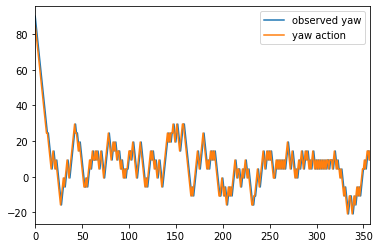

In [9]:
import pandas as pd
pd.DataFrame({'observed yaw': obs[:, 0], 'yaw action': 90 + (action[:, 0] - 1).cumsum() * 360 * 0.014}).plot()

In [ ]:
view_entity = None
origin = None
origins = []
times = []

time = None

def patch_vec(old_vec, update):
    return tuple(v if u is None else u for v, u in zip(old_vec, update))

with open(DEMO_FILE_NAME, 'rb') as f:
    for angles, msg in pyquake.proto.read_demo_file(f):
        if msg.msg_type == pyquake.proto.ServerMessageType.SETVIEW:
            view_entity = msg.viewentity
        if (msg.msg_type == pyquake.proto.ServerMessageType.SPAWNBASELINE and
                msg.entity_num == view_entity):
            origin = msg.origin
        if (msg.msg_type == pyquake.proto.ServerMessageType.UPDATE and
                msg.entity_num == view_entity):
            origin = patch_vec(origin, msg.origin)
            origins.append(origin)
            times.append(time)
        if msg.msg_type == pyquake.proto.ServerMessageType.TIME:
            time = msg.time

In [ ]:
import numpy as np
np.diff(np.array([o[1] for o in origins])[-100:]).mean() / 0.014

In [ ]:
plt.plot(times, [o[1] for o in origins])

observed angle = 1.5707963267948966 radians (90.0 degrees)
observed angle = 1.4828317331601726 radians (84.96000003814697 degrees)
observed angle = 1.3948671395254488 radians (79.92000007629396 degrees)
observed angle = 1.306902545890725 radians (74.88000011444093 degrees)
observed angle = 1.218937952256001 radians (69.8400001525879 degrees)
observed angle = 1.1309733586212771 radians (64.80000019073488 degrees)
observed angle = 1.0430087649865531 radians (59.76000022888185 degrees)
observed angle = 0.9550441713518293 radians (54.72000026702882 degrees)
observed angle = 0.8670795777171053 radians (49.680000305175795 degrees)
observed angle = 0.7791149840823814 radians (44.64000034332277 degrees)
observed angle = 0.6911503904476575 radians (39.60000038146974 degrees)
observed angle = 0.6031857968129335 radians (34.56000041961671 degrees)
observed angle = 0.5152212031782096 radians (29.520000457763686 degrees)
observed angle = 0.42725660954348565 radians (24.48000049591066 degrees)
obser

observed angle = -0.012566358630133957 radians (-0.7199993133544743 degrees)
observed angle = 0.07539823500458998 radians (4.320000648498553 degrees)
observed angle = 0.16336282863931392 radians (9.36000061035158 degrees)
observed angle = 0.25132742227403787 radians (14.400000572204608 degrees)
observed angle = 0.3392920159087618 radians (19.440000534057635 degrees)
observed angle = 0.4272566095434857 radians (24.480000495910662 degrees)
observed angle = 0.3392920159087618 radians (19.440000534057635 degrees)
observed angle = 0.4272566095434857 radians (24.480000495910662 degrees)
observed angle = 0.3392920159087618 radians (19.440000534057635 degrees)
observed angle = 0.4272566095434857 radians (24.480000495910662 degrees)
observed angle = 0.4272566095434857 radians (24.480000495910662 degrees)
observed angle = 0.5152212031782096 radians (29.520000457763686 degrees)
observed angle = 0.42725660954348565 radians (24.48000049591066 degrees)
observed angle = 0.33929201590876173 radians (1

observed angle = 0.16336282863931392 radians (9.36000061035158 degrees)
observed angle = 0.25132742227403787 radians (14.400000572204608 degrees)
observed angle = 0.16336282863931392 radians (9.36000061035158 degrees)
observed angle = 0.07539823500458998 radians (4.320000648498553 degrees)
observed angle = -0.012566358630133957 radians (-0.7199993133544743 degrees)
observed angle = -0.012566358630133955 radians (-0.7199993133544743 degrees)
observed angle = 0.07539823500458998 radians (4.320000648498553 degrees)
observed angle = 0.16336282863931392 radians (9.36000061035158 degrees)
observed angle = 0.07539823500458998 radians (4.320000648498553 degrees)
observed angle = 0.16336282863931392 radians (9.36000061035158 degrees)
observed angle = 0.07539823500458998 radians (4.320000648498553 degrees)
observed angle = 0.16336282863931392 radians (9.36000061035158 degrees)
observed angle = 0.07539823500458998 radians (4.320000648498553 degrees)
observed angle = 0.16336282863931392 radians (9